# Final Project: Regression Analysis - Medical Costs
**Author:** Eric Meyer

**Date:** 04/17/2025  

**Introduction:** In this project, we analyze a medical insurance dataset to predict individual medical costs billed by health insurance based on personal attributes. This regression task will help uncover the impact of age, BMI, smoking status, and other features on insurance charges.


## Section 1: Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('insurance.csv')
df.head(10)


<>:13: SyntaxWarning: invalid escape sequence '\P'
<>:13: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lexi\AppData\Local\Temp\ipykernel_24712\4225594818.py:13: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('C:\Projects\ml_regression_eric\insurance.csv')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and display summary statistics

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

### Reflection 1

- The dataset contains 1,338 records and 7 columns, each with complete data (no missing values).

- There are 3 categorical features:
  - sex
  - smoker
  - region

- And 4 numerical features:
  - age
  - bmi
  - children
  - charges (target variable)

- **Key Observations:**
  - Age ranges from 18 to 64, with a mean of ~39 years.
  - BMI values are mostly between 26 and 35, though some go as high as 53.
  - Charges are highly variable, ranging from just over $1,000 to more than $63,000, suggesting the presence of outliers or skew due to factors like smoking or chronic illness.

### 1.2 Check for Missing Values and Summary Statistics

In [8]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Missing Values:
 variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Summary Statistics:
           variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


### Reflection 1:

**What do you notice about the dataset?**
- Their are 1,372 datapoints and four numerical features (variance, skewness, curtosis, and entropy)
- The mean as well as the std vary quite vastly, so we may need to scale for ML models
- The class column represents authentic or not fro the banknote (0 or 1)

**Are there any data issues?**
- There is not missing data
- Our summary does confirm the wide range of values such as skewness going from -13.77 to 12.95

## Section 2: Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

<Figure size 1200x800 with 0 Axes>

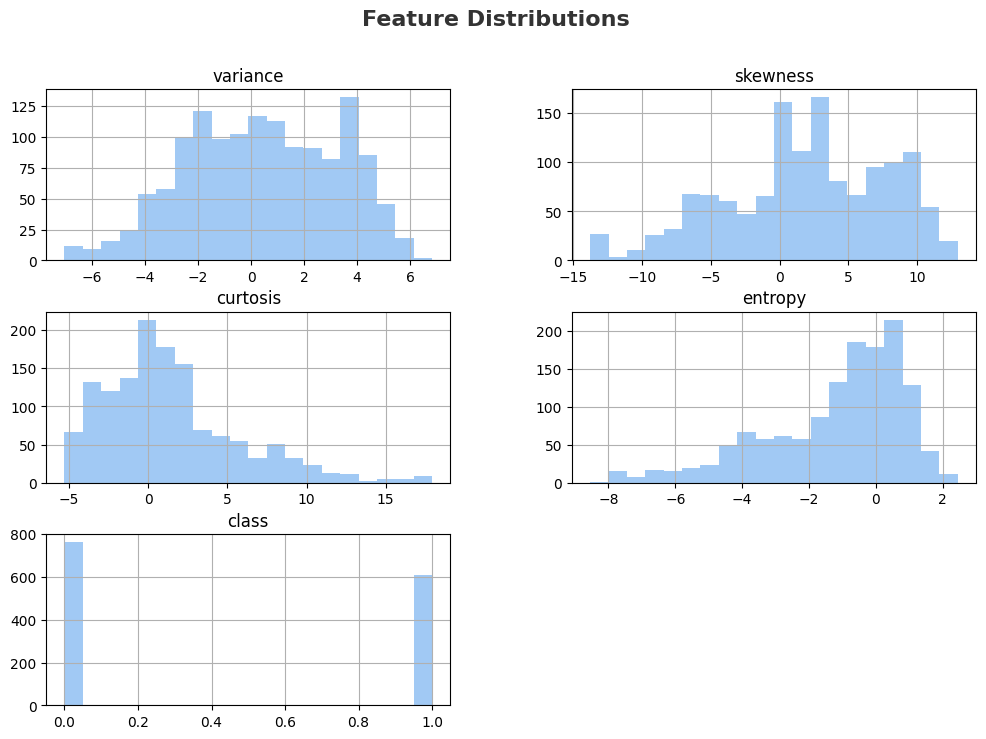

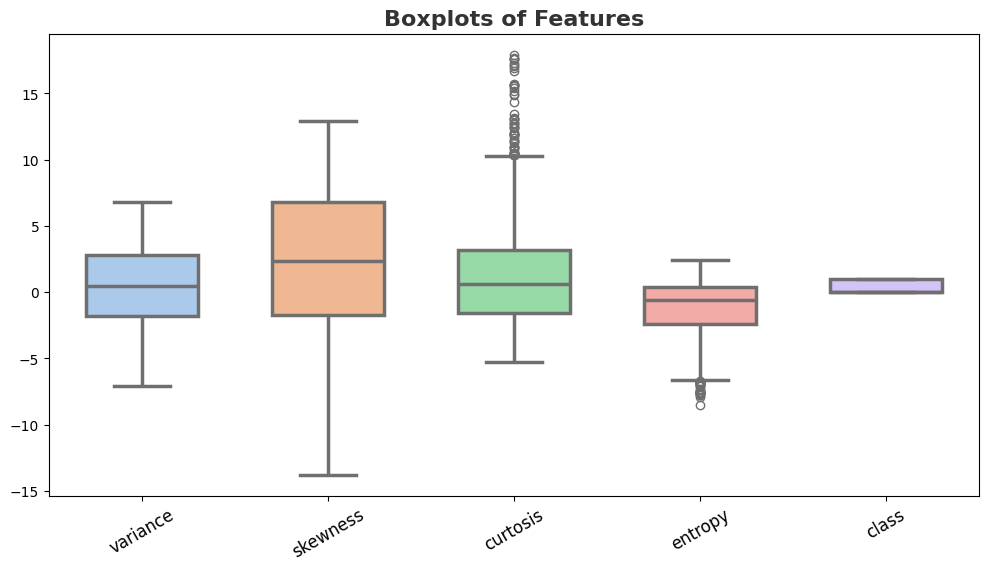

In [10]:
# Histograms
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=20, color=sns.color_palette("pastel")[0])
plt.suptitle("Feature Distributions", fontsize=16, fontweight='bold', color='#333333')
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="pastel", linewidth=2.5, width=0.6)
plt.xticks(rotation=30, fontsize=12)
plt.title("Boxplots of Features", fontsize=16, fontweight='bold', color='#333333')
plt.show()

### 2.2 Handle Missing Values and Clean Data

#### No missing values detected in previous step, but I will verify data type for our binary column ('Class')

In [12]:
# Confirming our binary column for 'class' is actual integers

print(df['class'].dtype)


int64


### 2.3 Feature Selection and Engineering

In [13]:
# Scale the data to normalize feature distributions
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Reflection 2:

**What patterns or anomalies do you see?**
- Variance and skewness seem somewhat evenly distributed while curtosis and entropy are skewed. Curtosis is left skewed while entropy is right skewed
- There are outliers, but I am curious to see if those are used to identify fraud

**What features did I change?**
- I did not change or encode any features as all columns were numerical which the model can work with well
- I did scale the X features in order to normalize distributions

## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

- The **features** (`variance`, `skewness`, `curtosis`, `entropy`) are used to predict the `class` (0 = authentic, 1 = fake banknote).
- These features were chosen based on dataset documentation from UC Irvine

### 3.2 Define X and Y

In [14]:
# Define features and target
X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target

### Reflection 3:

**Why did you choose these features?**
- I chose all features as their is limited fields in this dataset and I think they can all be used to identify fraud
- No categorial encoding was needed as they were all numerical

## Section 4: Train a Classification Model

### 4.1 Split the Data

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


### 4.2 Create and Train Model (Decision Tree)

In [16]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.3 Evaluate Model Performance

Accuracy: 0.9927272727272727
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



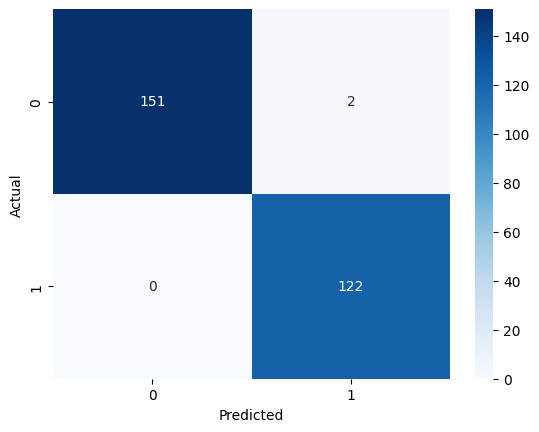

In [17]:
# Predict on test data
y_pred = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Relection 4:

**How well did the model perform?**
- The decision tree model performs extremely well for bank fraud prediction. 99% is hard to accomplish for a model and it was able to do that on this Bank Authenticatoin dataset.

**Any suprising results?**
- The confusion matrix shows that there were 0 false positives and 2 false negatives, which means the model had very few misclassifications. This suggests the model is effective for the task of banknote authentication.

## Section 5: Try Alternate Model

### 5.1 Train Alternative Classifier (Random Forest)

In [18]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

### 5.2 Compare Model Performance

In [19]:
# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9963636363636363
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### Reflection 5:

**Which model performed better? Why?**
- The random forest model outperformed the decision tree model (99.6% compared to 99%)
- This tells me that the random forest model is also very good for bank fraud detection
- The random forest uses multiple decision trees to predict and trains using subsets of the data. This can reduce overfitting and improve generalization compared to using only one tree.

## Section 6: Final Thoughts and Insights

### 6.1 Summarize Findings

The Banknote Authentication dataset was successfully classified using Decision Tree and Random Forest models. The Decision Tree model performed well, achieving a good accuracy, but the Random Forest model showed slightly better performance, with an accuracy of 99.6%, compared to Decision Tree's 99.2%.

Random Forest showed superior results due to its ensemble nature, reducing overfitting and improving stability.

Data standardization played an essential role in enhancing model performance, particularly for Random Forest, by normalizing feature distributions and improving generalization.

### 6.2 Discuss Challenges Faces

Hyperparameter tuning was a challenge, especially in finding the right balance to avoid overfitting with Decision Tree. This was mitigated somewhat by Random Forest's ensemble nature, which helped to prevent overfitting to individual patterns in the data.

The dataset contained outliers (as seen in boxplots), which may have been important for detecting fraudulent transactions (or "fake" banknotes). These outliers could have influenced the models’ ability to distinguish between normal and fraudulent instances, particularly in the Random Forest model.

### 6.3 If You Had More Time, What Would You Try Next?

Testing other models like Logistic Regression and SVM to compare their performance and see if they could provide additional insight or accuracy gains.

I also would want to try prediction on another dataset in a different industry.